# **Benchmarking Automated EDA Tools: Performance Comparison on Diverse Datasets**



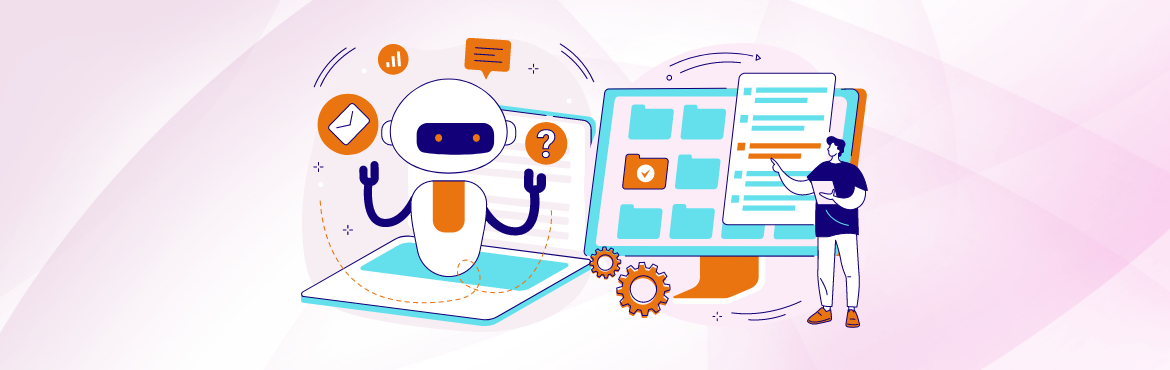

Introduction to Auto EDA Libraries in Python
Exploratory Data Analysis (EDA) is a critical first step in any data science project, providing valuable insights into the dataset's structure and properties before formal modeling begins. Various Auto-EDA libraries in Python streamline this process by automatically generating detailed reports, visualizations, and summary statistics. Some of the most popular Auto-EDA libraries include:

* DataPrep
* Pandas Profiling
* SweetViz
* AutoViz
* SummaryTools
* D-Tale
* K-lib
* PandasGUI
* Dora
* ExploriPy

This project, however, will focus on three primary libraries: **AutoViz**, **SweetViz**, and **Pandas Profiling**. Each of these libraries will be executed and benchmarked based on their performance on specific datasets.

# **📔 Structure of the Notebook**

1. **Executing the Auto EDA Libraries on a Single Dataset**
    - In the first section, I will apply AutoViz, SweetViz, and Pandas Profiling to a common dataset. The goal here is to see the outputs and compare the visual reports generated by each library.

2. **Benchmarking the Auto EDA Tools for Performance**
  
    The second section of this notebook will delve into performance benchmarking to assess how each of these tools handles different datasets. The benchmarks will include key performance metrics such as:

    * Runtime (seconds)
    * Memory Usage (MB)
    * CPU Usage (%)
    * CPU Cores
    
    To provide comprehensive coverage, I will benchmark these tools using three distinct datasets:

    * [Titanic](https://www.kaggle.com/competitions/titanic)
      - A well-known, small dataset with a manageable size (891 rows, 12 columns).
      - Ideal for quick analysis with no significant missing values.
    * [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)
      - A medium-sized dataset (1460 rows, 80 columns) with missing data, outliers, and a variety of data types including numerical, categorical, and textual data.
      - It challenges the EDA tools to handle different data types and quality issues effectively.
    * [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration)
      - A large-scale dataset (14.5 million rows, 11 columns) consisting of trip duration and other time-series features.
      - This dataset tests the scalability of the EDA tools and how they perform on big data, especially in terms of memory usage and runtime.

3. **Benchmarking Results**: To accurately capture performance, I will benchmark the tools in three phases:

    - First Run: The initial execution of the library.
    - Warm-Up Average: The average of several subsequent runs to stabilize any caching or optimization effects.
    - Final Run: The final execution after the warm-up phase, representing a steady-state performance.

4. **Conclusion**
    - In this section, I will summarize the key findings and insights drawn from the benchmarking of various Automated Exploratory Data Analysis (EDA) tools across different datasets. I will analyze the performance trade-offs, strengths, and weaknesses of each tool, highlighting how they handle datasets of varying sizes and complexities. Additionally, I will provide recommendations on the most suitable tools for specific types of data and use cases, based on factors such as runtime efficiency, memory usage, CPU performance, and overall scalability.

In [ ]:
%%capture
!pip install ydata-profiling
!pip install sweetviz
!pip install autoviz

In [ ]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
from ydata_profiling import ProfileReport
import sweetviz as sv
from autoviz.AutoViz_Class import AutoViz_Class

import time
import tracemalloc
import psutil
import os
import gc
import traceback
from prettytable import PrettyTable

In [ ]:
df_titanic = pd.read_csv("/titanic/train.csv")
df_house_price = pd.read_csv("/house-prices-advanced-regression-techniques/train.csv")
df_nyc_tx = pd.read_csv("/nyc-taxi-trip-duration/train.csv")

# **1. Executing the Auto EDA Libraries on a Single Dataset**

In this part, I will use AutoViz, SweetViz, and Pandas Profiling on a single dataset to observe and compare their visual outputs. This comparison will help us understand how each library presents exploratory data analysis and the kind of insights they generate.

### **Pandas Profiling**

In [ ]:
ProfileReport(df_titanic)

Output hidden; open in https://colab.research.google.com to view.

### **Sweetviz**

                                             |          | [  0%]   00:00 -> (? left)


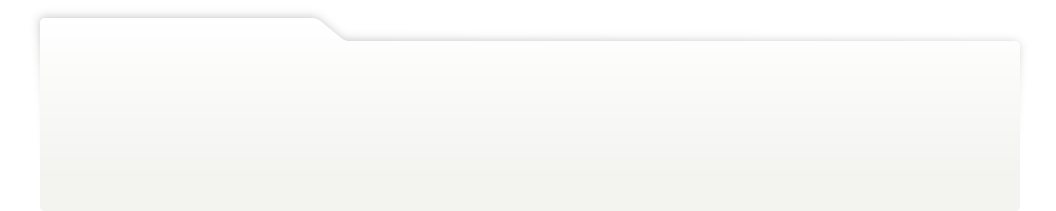
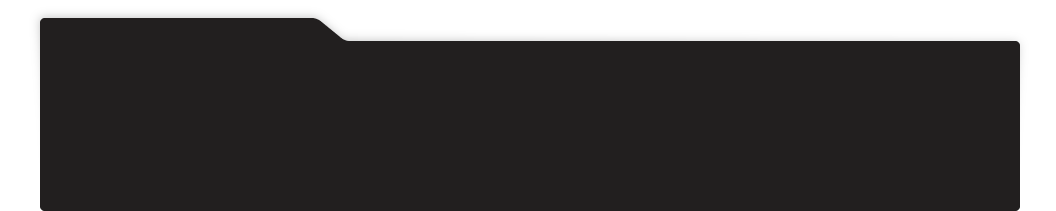
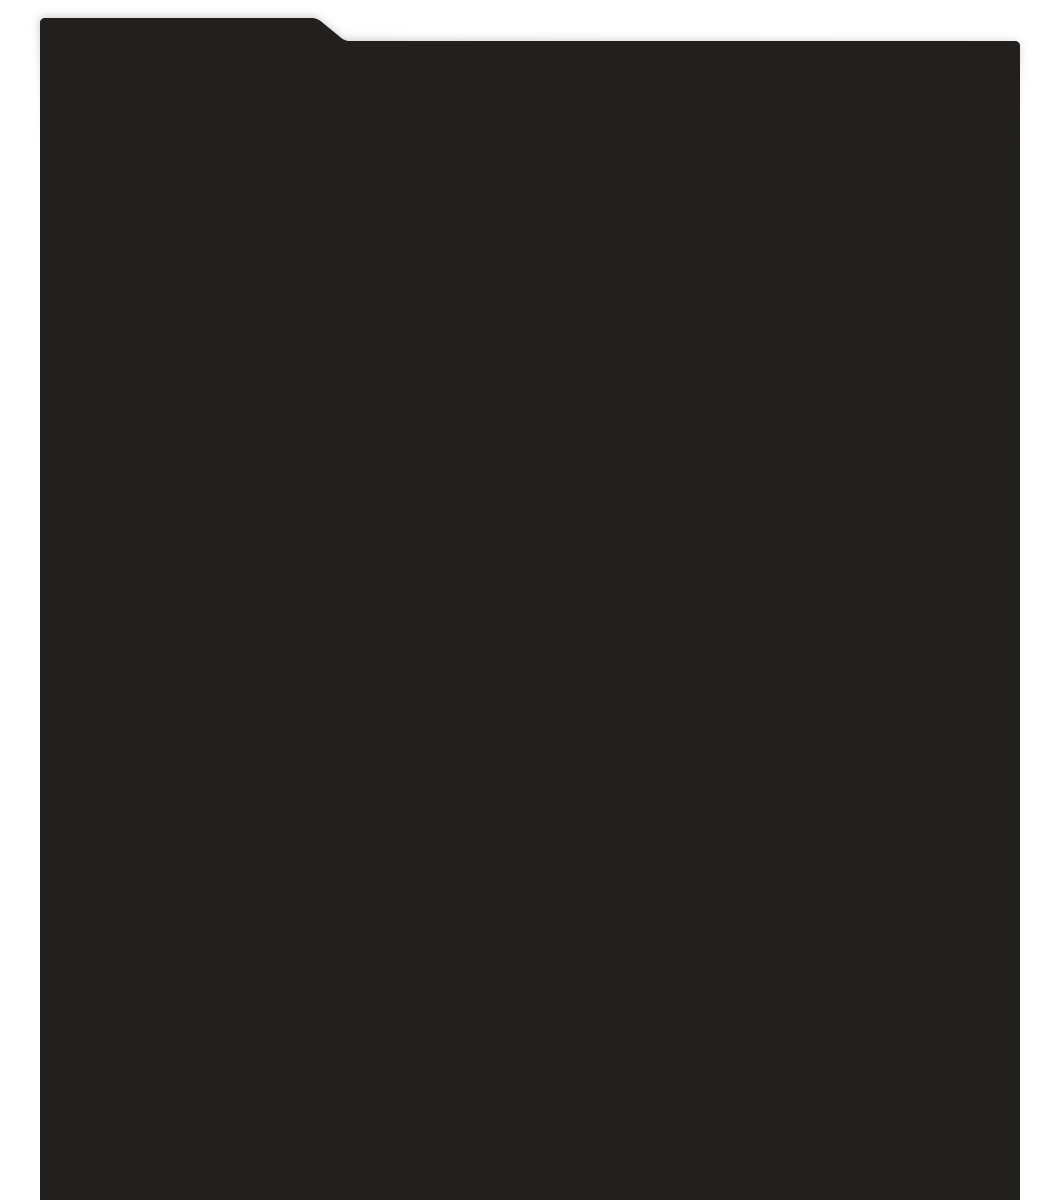
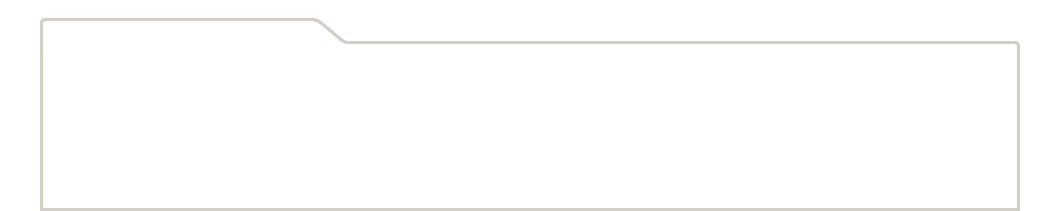
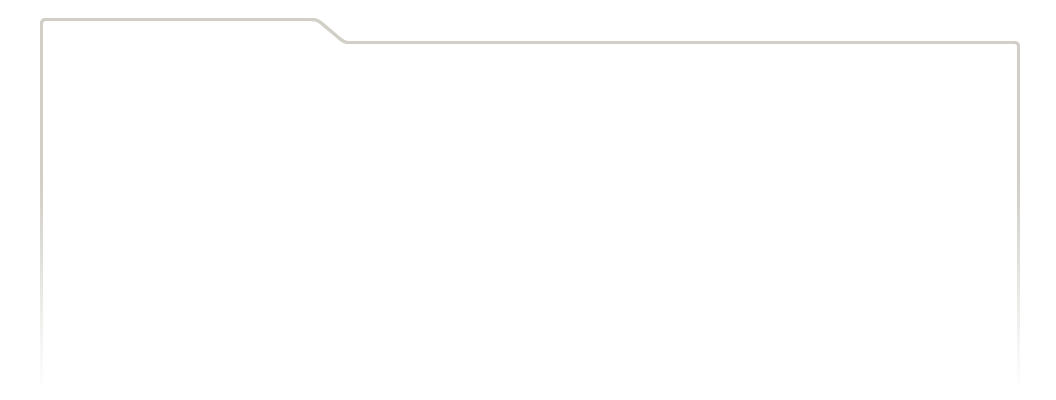
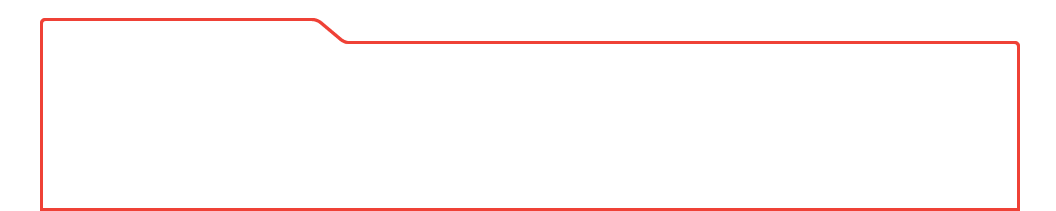
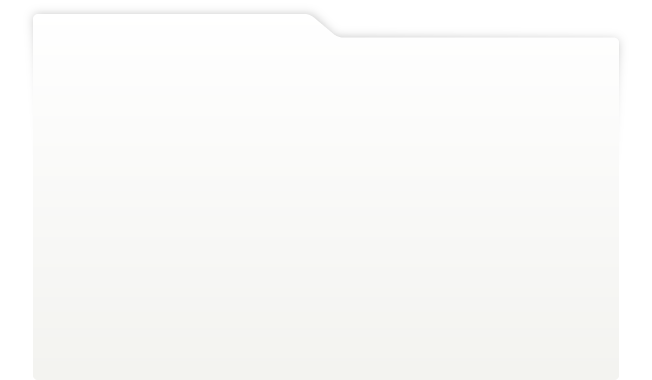
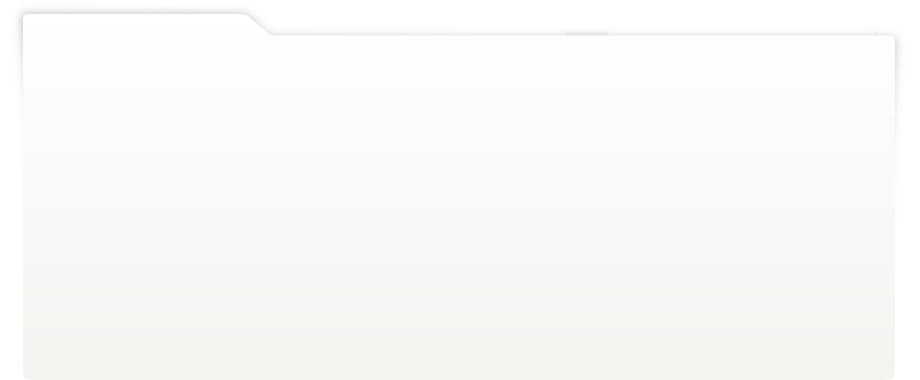
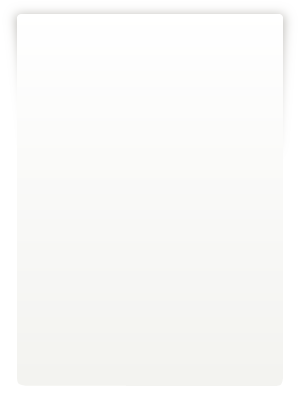
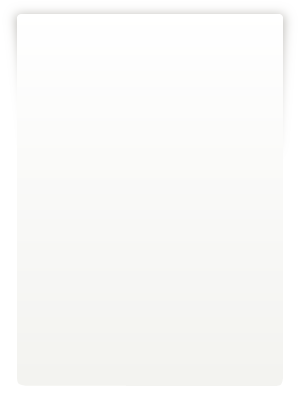
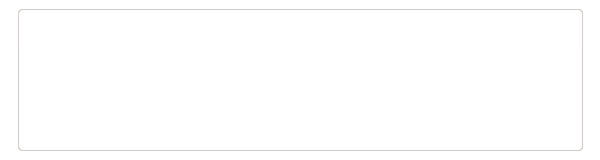
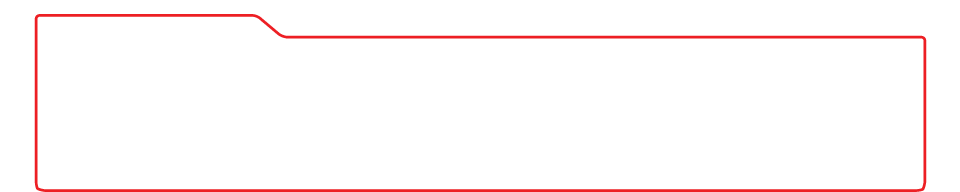
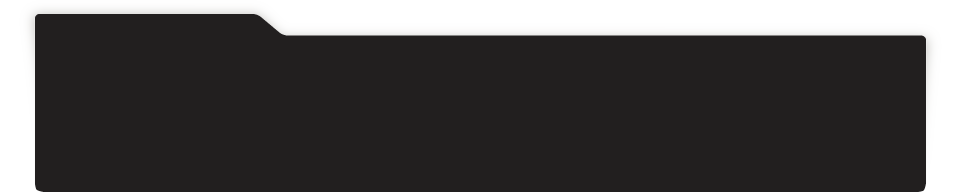
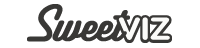
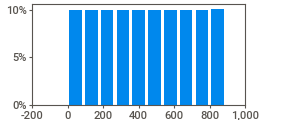
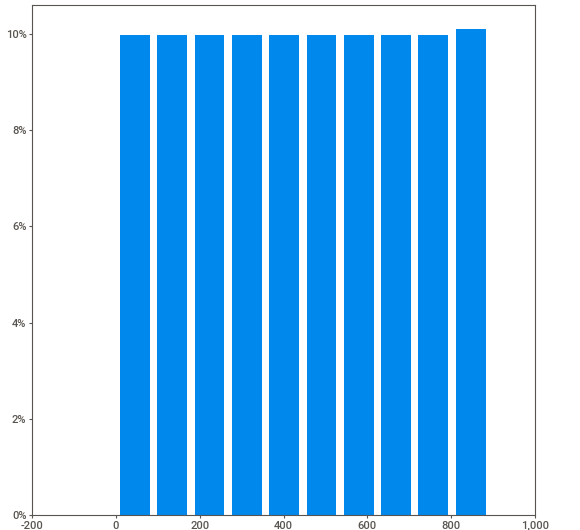
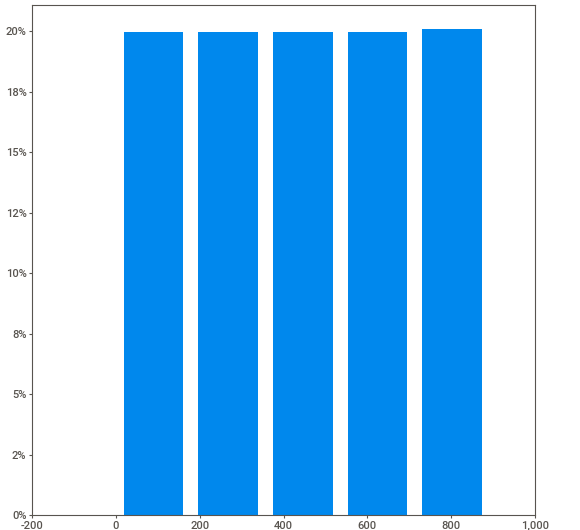
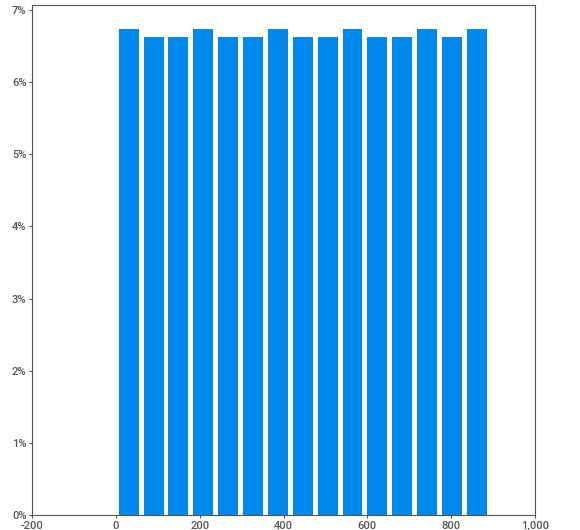
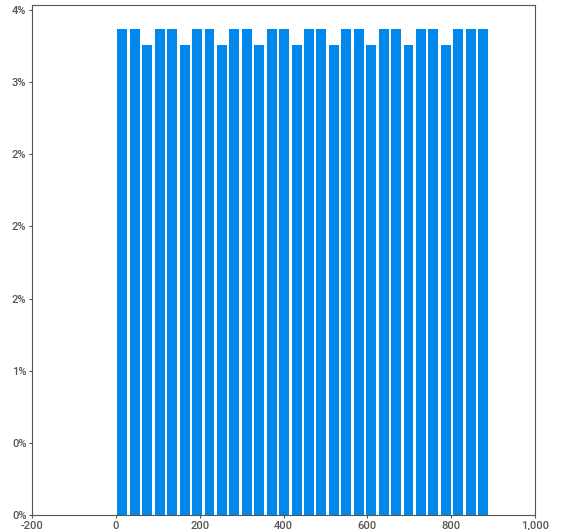
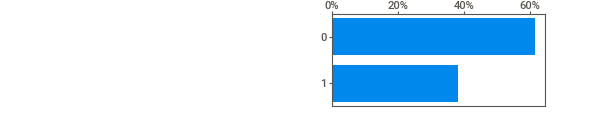
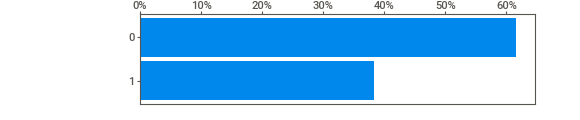
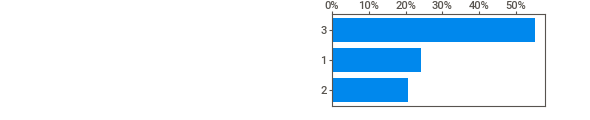
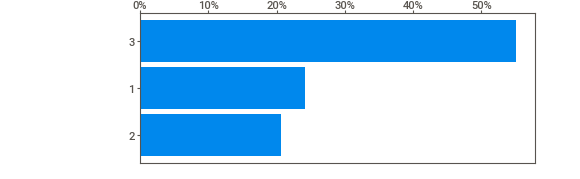
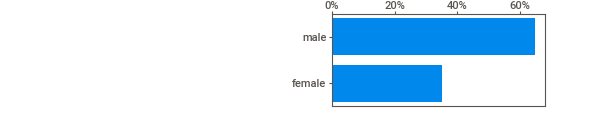
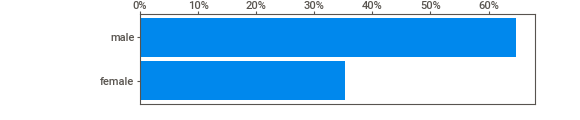
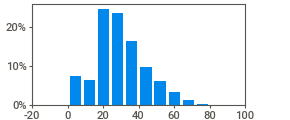
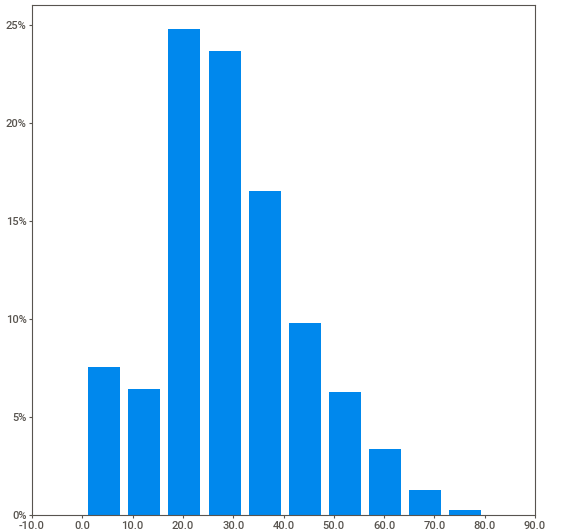
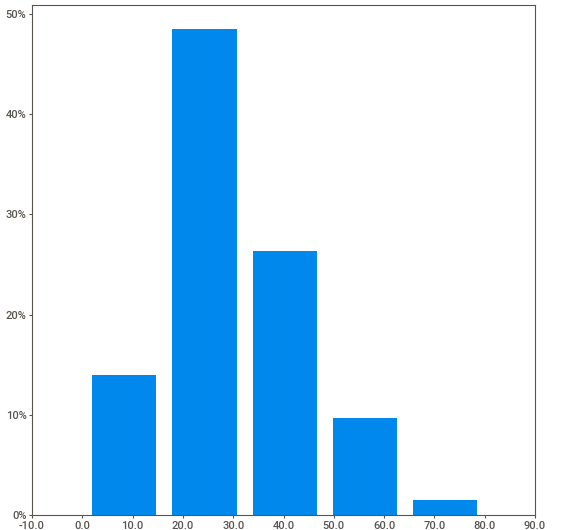
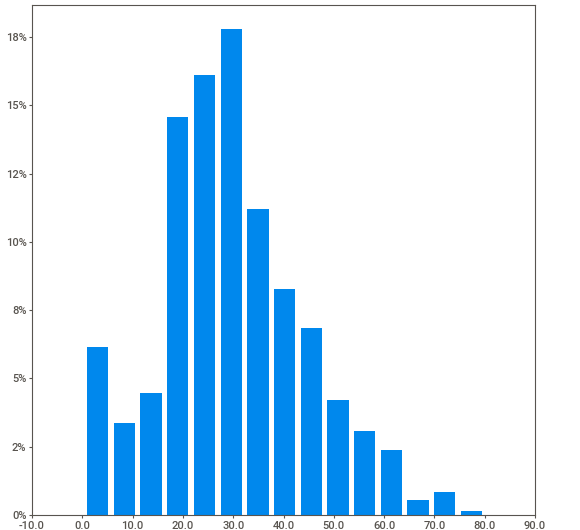
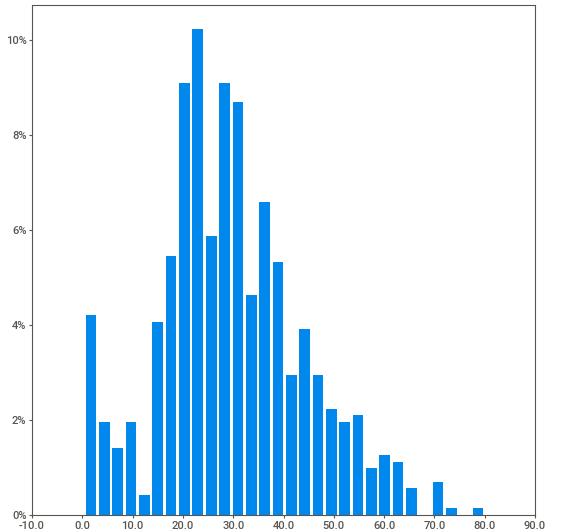
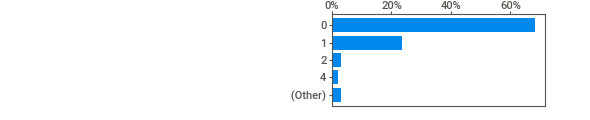
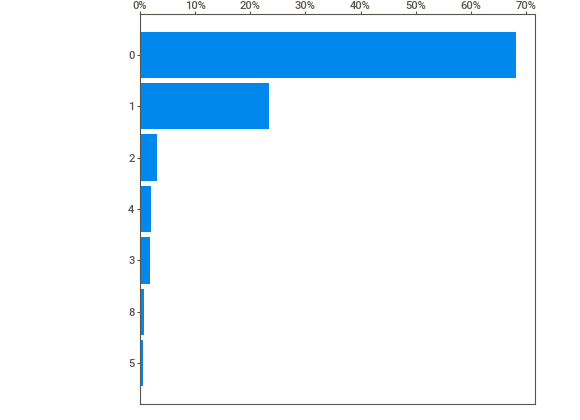
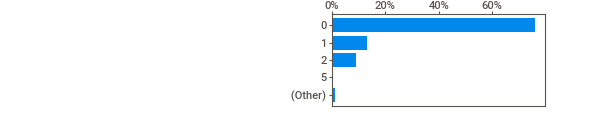
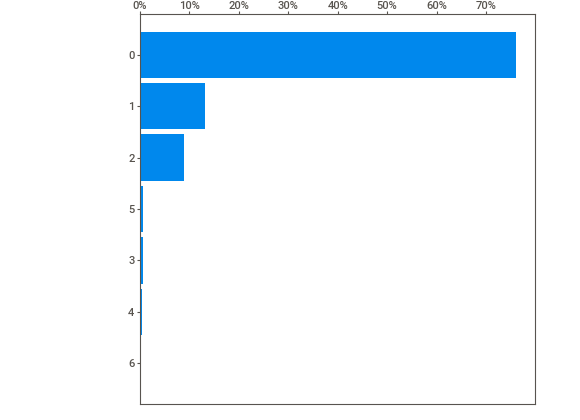
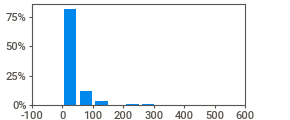
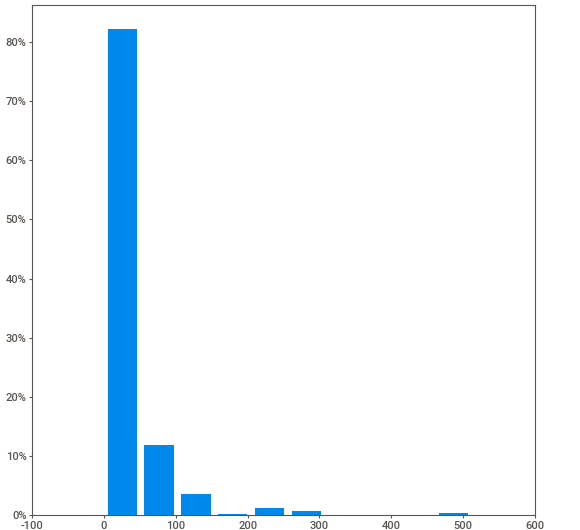
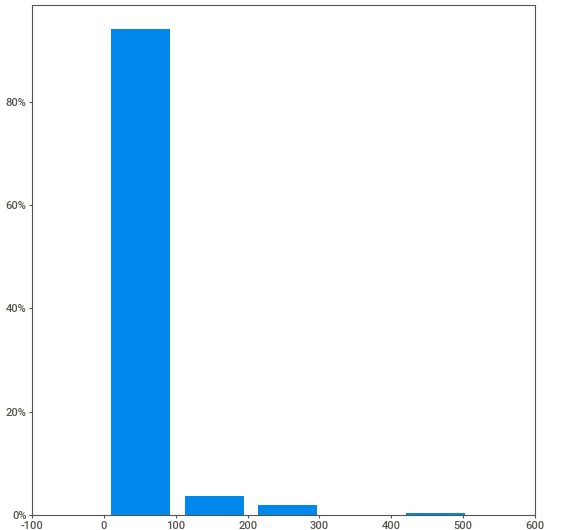
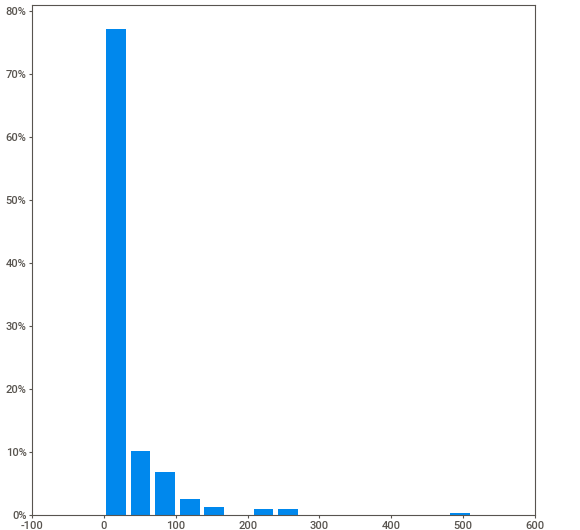
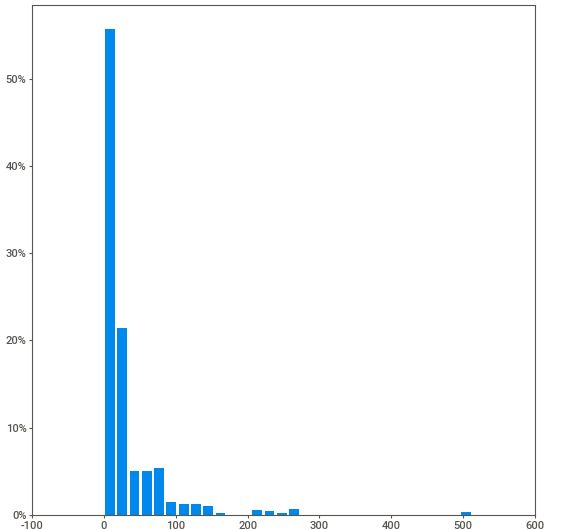
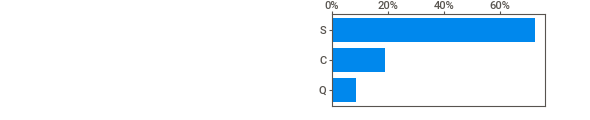
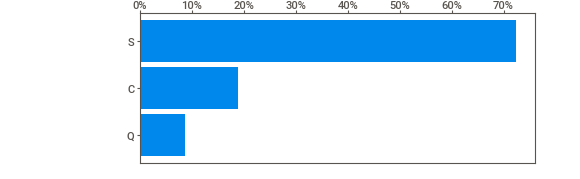
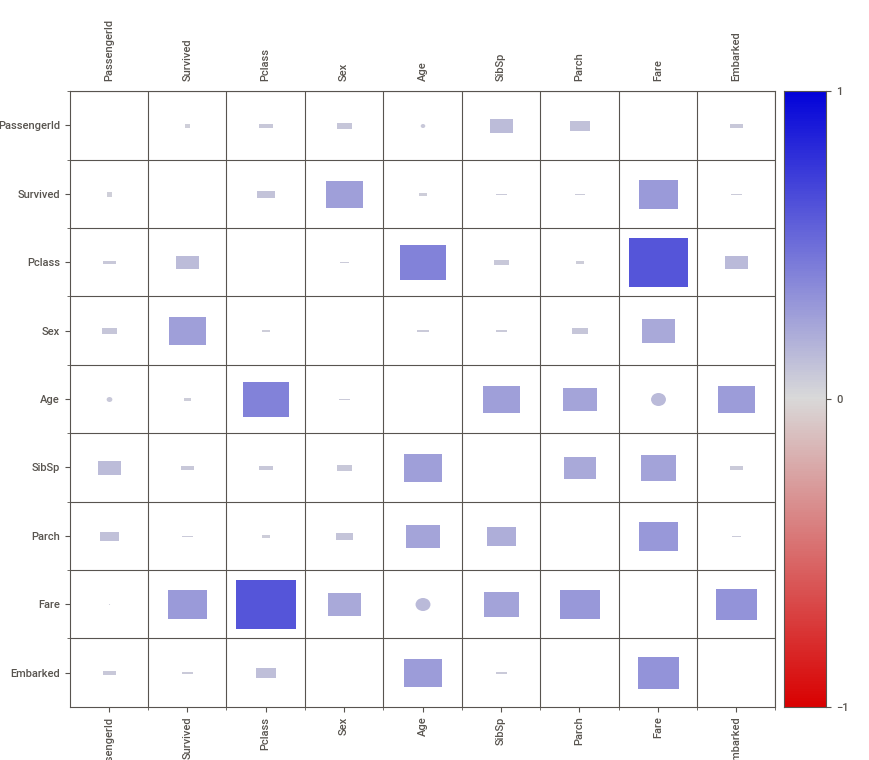
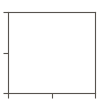

In [ ]:
my_report = sv.analyze(df_titanic)
my_report.show_notebook()

### **Autoviz**

In [ ]:
%matplotlib inline
AV = AutoViz_Class()
AV.AutoViz(df_titanic)

# **2. Benchmarking the Auto EDA Tools for Performance**

This section focuses on evaluating the efficiency of each EDA tool by measuring key performance indicators such as execution time, memory consumption, and CPU usage. We'll apply these tools to datasets of varying sizes to test their scalability and efficiency, from small to large datasets.

In [ ]:
def benchmark_eda_tool(eda_function, *args, **kwargs):
    def perform_benchmark():
        start_time = time.time()
        tracemalloc.start()
        gc.collect()

        process = psutil.Process()
        initial_cpu_percent = process.cpu_percent(interval=None)  # Initial measurement

        try:
            eda_function(*args, **kwargs)
        except Exception as e:
            return {"error": str(e), "traceback": traceback.format_exc()}

        end_time = time.time()
        current, peak_memory = tracemalloc.get_traced_memory()
        tracemalloc.stop()
        gc.collect()

        final_cpu_percent = process.cpu_percent(interval=None)

        runtime = end_time - start_time
        peak_memory_mb = peak_memory / (1024 * 1024)

        cpu_usage_percent = final_cpu_percent - initial_cpu_percent

        return {
            "runtime_seconds": runtime,
            "peak_memory_mb": peak_memory_mb,
            "cpu_usage_percent": cpu_usage_percent,
            "cpu_cores": psutil.cpu_count(logical=True)
        }

    first_result = perform_benchmark()

    warm_up_results = []
    for _ in range(5):  # Perform 5 warm-up runs
        result = perform_benchmark()
        if "error" in result:
            return result
        warm_up_results.append(result)

    final_result = perform_benchmark()

    results = {
        "first_result": first_result,
        "warm_up_results": warm_up_results,
        "final_result": final_result
    }

    return results

In [ ]:
def benchmark_all_eda_tools(df):
    AV = AutoViz_Class()

    eda_functions = {
        "Sweetviz": lambda df: sv.analyze(df),
        "Pandas Profiling": lambda df: ProfileReport(df, progress_bar=False),
        "Autoviz": lambda df: AV.AutoViz(df, verbose=0)
    }

    results = {}

    for name, eda_func in eda_functions.items():
        print(f"Benchmarking {name}...")
        results[name] = benchmark_eda_tool(eda_func, df)

    return results

In [ ]:
def format_benchmark_output(benchmark_results):

    for name, result in benchmark_results.items():
        print(f"\n--- {name} EDA Tool Benchmark Results ---\n")

        table = PrettyTable()
        table.field_names = ["Metric", "First Result", "Warm-up Avg", "Final Result"]

        first_result = result['first_result']

        if len(result['warm_up_results']) > 0:
            warm_up_avg_runtime = sum(run['runtime_seconds'] for run in result['warm_up_results']) / len(result['warm_up_results'])
            warm_up_avg_memory = sum(run['peak_memory_mb'] for run in result['warm_up_results']) / len(result['warm_up_results'])
            warm_up_avg_cpu = sum(run['cpu_usage_percent'] for run in result['warm_up_results']) / len(result['warm_up_results'])
        else:
            warm_up_avg_runtime = 0
            warm_up_avg_memory = 0
            warm_up_avg_cpu = 0

        final_result = result['final_result']

        table.add_row(["Runtime (seconds)", f"{first_result['runtime_seconds']:.2f}", f"{warm_up_avg_runtime:.2f}", f"{final_result['runtime_seconds']:.2f}"])
        table.add_row(["Memory Usage (MB)", f"{first_result['peak_memory_mb']:.2f}", f"{warm_up_avg_memory:.2f}", f"{final_result['peak_memory_mb']:.2f}"])
        table.add_row(["CPU Usage (%)", f"{first_result['cpu_usage_percent']:.2f}", f"{warm_up_avg_cpu:.2f}", f"{final_result['cpu_usage_percent']:.2f}"])
        table.add_row(["CPU Cores", first_result['cpu_cores'], first_result['cpu_cores'], final_result['cpu_cores']])

        print(table)

### **I. Titanic**

In [ ]:
%%capture
benchmark_results_titanic = benchmark_all_eda_tools(df_titanic)

In [ ]:
format_benchmark_output(benchmark_results_titanic)


--- Sweetviz EDA Tool Benchmark Results ---

+-------------------+--------------+-------------+--------------+
|       Metric      | First Result | Warm-up Avg | Final Result |
+-------------------+--------------+-------------+--------------+
| Runtime (seconds) |    15.99     |    14.88    |    15.02     |
| Memory Usage (MB) |    23.31     |    23.35    |    23.38     |
|   CPU Usage (%)   |    107.10    |    116.56   |    120.10    |
|     CPU Cores     |      2       |      2      |      2       |
+-------------------+--------------+-------------+--------------+

--- Pandas Profiling EDA Tool Benchmark Results ---

+-------------------+--------------+-------------+--------------+
|       Metric      | First Result | Warm-up Avg | Final Result |
+-------------------+--------------+-------------+--------------+
| Runtime (seconds) |     0.51     |     0.43    |     0.50     |
| Memory Usage (MB) |     0.41     |     0.19    |     0.15     |
|   CPU Usage (%)   |    58.30     |    69

### **II. House Prices - Advanced Regression Techniques**

In [ ]:
%%capture
benchmark_results_house_price = benchmark_all_eda_tools(df_house_price)

In [ ]:
format_benchmark_output(benchmark_results_house_price)


--- Sweetviz EDA Tool Benchmark Results ---

+-------------------+--------------+-------------+--------------+
|       Metric      | First Result | Warm-up Avg | Final Result |
+-------------------+--------------+-------------+--------------+
| Runtime (seconds) |    195.74    |    241.36   |    274.40    |
| Memory Usage (MB) |    188.55    |    190.17   |    188.44    |
|   CPU Usage (%)   |    113.60    |    108.98   |    109.20    |
|     CPU Cores     |      2       |      2      |      2       |
+-------------------+--------------+-------------+--------------+

--- Pandas Profiling EDA Tool Benchmark Results ---

+-------------------+--------------+-------------+--------------+
|       Metric      | First Result | Warm-up Avg | Final Result |
+-------------------+--------------+-------------+--------------+
| Runtime (seconds) |     0.63     |     0.56    |     0.48     |
| Memory Usage (MB) |     0.15     |     0.17    |     0.31     |
|   CPU Usage (%)   |    67.10     |    73

### **III. New York City Taxi Trip Duration**

In [ ]:
%%capture
benchmark_results_nyc_tx = benchmark_all_eda_tools(df_nyc_tx)

In [ ]:
format_benchmark_output(benchmark_results_nyc_tx)


--- Sweetviz EDA Tool Benchmark Results ---

+-------------------+--------------+-------------+--------------+
|       Metric      | First Result | Warm-up Avg | Final Result |
+-------------------+--------------+-------------+--------------+
| Runtime (seconds) |    360.31    |    318.53   |    316.92    |
| Memory Usage (MB) |   1912.49    |   1902.20   |   1902.90    |
|   CPU Usage (%)   |    98.60     |    99.98    |    100.10    |
|     CPU Cores     |      2       |      2      |      2       |
+-------------------+--------------+-------------+--------------+

--- Pandas Profiling EDA Tool Benchmark Results ---

+-------------------+--------------+-------------+--------------+
|       Metric      | First Result | Warm-up Avg | Final Result |
+-------------------+--------------+-------------+--------------+
| Runtime (seconds) |     0.69     |     0.57    |     0.52     |
| Memory Usage (MB) |     0.20     |     0.16    |     0.15     |
|   CPU Usage (%)   |    59.10     |    75

# **3. Benchmarking Results**

In this section, I present the benchmarking results of the three Auto EDA tools: AutoViz, SweetViz, and Pandas Profiling. The table below summarizes the performance across three datasets—Titanic, House Price, and NYC Trip—highlighting key metrics such as runtime, CPU usage, memory consumption, and the number of CPU cores utilized.

Each cell in the table will display the measured performance values, giving a clear comparison of how each tool handles different dataset sizes and complexities.

**Important Note 1:** AutoViz has limitations in row and column counts:
* If the row count exceeds 150,000, AutoViz selects a random 150,000 rows from the dataset.
* Similarly, if the column count exceeds 30, AutoViz selects the top 30 columns for exploratory data analysis.

⚠️ ⚠️ Due to these limitations, AutoViz has selected 150,000 random rows from the NYC Taxi Trip Duration dataset and the first 30 columns from the House Price dataset.

**Important Note 2:** The "CPU Usage Percentage" results may exceed 100%. You can find the reason and solution in the following information from the [Psutil documentation](https://psutil.readthedocs.io/en/latest/#psutil.Process.cpu_percent).

> **Note:** the returned value can be > 100.0 in case of a process running multiple threads on different CPU cores.

> **Note:** the returned value is explicitly not split evenly between all available CPUs (differently from psutil.cpu_percent()). This means that a busy loop process running on a system with 2 logical CPUs will be reported as having 100% CPU utilization instead of 50%. This was done in order to be consistent with top UNIX utility and also to make it easier to identify processes hogging CPU resources independently from the number of CPUs. It must be noted that taskmgr.exe on Windows does not behave like this (it would report 50% usage instead). To emulate Windows taskmgr.exe behavior you can do: p.cpu_percent() / psutil.cpu_count().



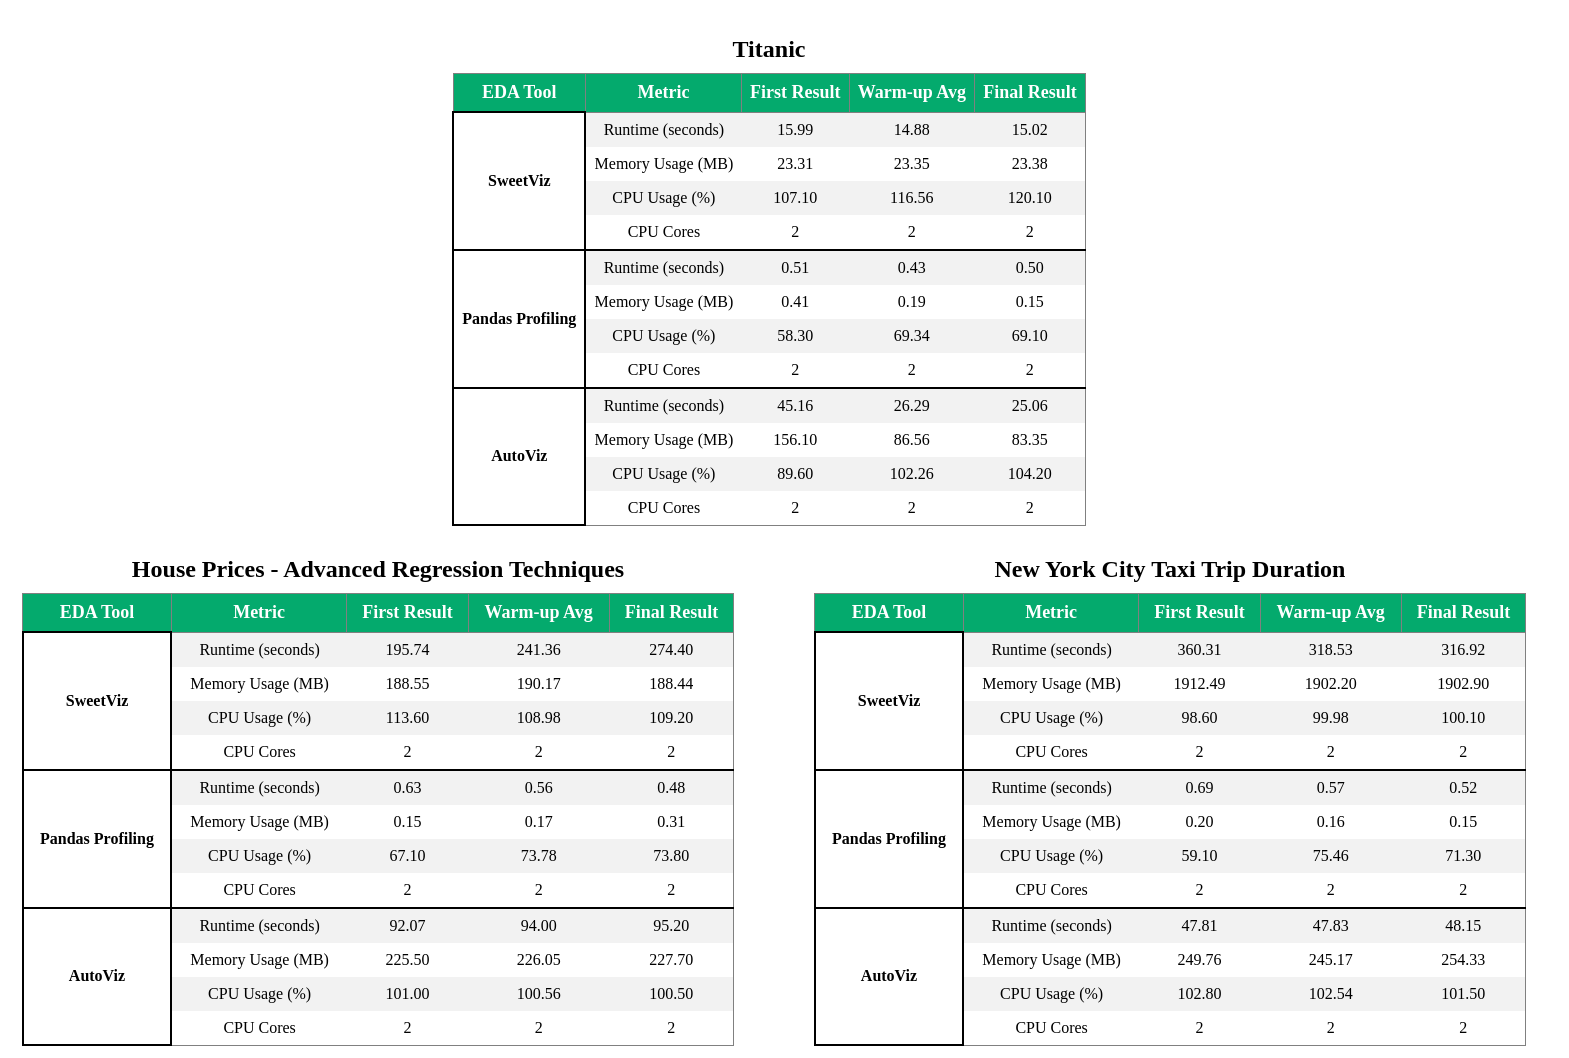

In [ ]:
from IPython.display import display, Image
display(Image(filename='/result_table.png'))

# **4. Conclusion**

### **Titanic Dataset:**

- **Context:** The Titanic dataset is a small, well-known dataset with 891 rows and 12 columns. It is ideal for quick exploratory data analysis (EDA), as it contains no significant missing values and provides a mix of numerical and categorical variables.

- **Sweetviz:** With a runtime of ~15 seconds and CPU usage reaching up to 120%, Sweetviz seems over-resourced for such a small dataset. While it provides rich visualizations, the higher runtime and CPU usage indicate that it may be better suited for more detailed analysis, rather than for quick insights on smaller datasets like Titanic.

- **Pandas Profiling:** The clear winner for the Titanic dataset, with a near-instant runtime (~0.50 seconds), minimal memory usage, and CPU usage under 70%. It provides a complete EDA with extremely low resource consumption, making it the ideal tool for datasets of this size.

- **AutoViz:** With a runtime of approximately 25 seconds, AutoViz takes longer than Pandas Profiling, although it is still relatively quick. The CPU usage is reasonable (~104%), indicating efficient multi-threading. However, the higher runtime compared to Pandas Profiling makes it less optimal for small datasets.

### **House Prices - Advanced Regression Techniques:**

- **Context:** This dataset is medium-sized, containing 1460 rows and 80 columns. It has missing data, outliers, and mixed data types (numerical, categorical, and text), making it a more challenging EDA task. Tools must handle these complexities effectively to provide insightful analysis.

- **Sweetviz:** Sweetviz struggles with this medium-sized dataset, taking about 274 seconds to complete its analysis. The CPU usage (~109%) suggests that it is utilizing multi-threading, but the long runtime and consistent memory usage (approximately 188 MB) show that Sweetviz may not scale efficiently with increasing dataset size and complexity.

- **Pandas Profiling:** Once again, Pandas Profiling outperforms the others with a runtime of just about 0.48 seconds. Memory usage remains minimal, and CPU usage is controlled (~73%). It proves that even with a moderately complex dataset, Pandas Profiling can efficiently handle missing data and a variety of data types without a significant hit to performance.

- **AutoViz:** AutoViz takes approximately 95 seconds to analyze the House Prices dataset. It performs better than Sweetviz in terms of runtime but still lags behind Pandas Profiling. The memory usage (~227 MB) is higher due to the detailed analysis AutoViz conducts, indicating that it is well-suited for more in-depth exploratory analysis but with a trade-off in speed.

### **New York City Taxi Trip Duration:**

- **Context:** This is a large-scale dataset with 14.5 million rows and 11 columns. It mainly consists of trip durations and other time-series features. This dataset tests the EDA tools' scalability, particularly in terms of runtime and memory usage when working with big data.

- **Sweetviz:** Sweetviz’s runtime (about 317 seconds) and high memory usage (~1.9 GB) reveal that it struggles with scalability. While CPU usage (about 100%) indicates efficient multi-threading, Sweetviz is not an ideal tool for handling large datasets like NYC Taxi Trip Duration. Its high memory consumption limits its practicality for big data analysis.

- **Pandas Profiling:** Pandas Profiling continues to perform impressively even with such a large dataset, completing its analysis in just approximately 0.52 seconds. Memory usage is kept extremely low, and CPU usage remains efficient (~71%). This makes Pandas Profiling the most scalable tool, suitable for both small and large datasets without overburdening system resources.

- **AutoViz:** With a runtime of ~48 seconds, AutoViz is faster than Sweetviz but much slower than Pandas Profiling. Its memory usage (about 254 MB) is significantly higher than Pandas Profiling, but still much lower than Sweetviz. AutoViz provides a good balance of in-depth analysis for large datasets, but its performance trade-off may not be worth it compared to the extremely fast Pandas Profiling.




## **Summary**

- **Titanic:** A small, well-known dataset ideal for quick analysis. Pandas Profiling outperforms both Sweetviz and AutoViz, offering fast and resource-efficient results.
- **House Prices - Advanced Regression Techniques:** A medium-sized dataset with complexity in data types and quality. Pandas Profiling is still the most efficient, but AutoViz can offer deeper insights if you can tolerate longer runtimes and higher memory usage.
- **New York City Taxi Trip Duration:** A large-scale dataset testing scalability. Pandas Profiling remains highly efficient, while AutoViz is a reasonable alternative if deeper analysis is needed. Sweetviz struggles with large datasets, displaying high memory usage and long runtimes.


## **Final Conclusion:**
- **Pandas Profiling** is the most efficient tool across datasets of all sizes, consistently providing quick results with minimal resource consumption. It is highly recommended for users who need **fast, lightweight EDA** without sacrificing accuracy or depth of insights.
- **AutoViz** provides a good balance of detailed analysis and performance. It is more suited to scenarios where users need deeper insights, especially for medium to large datasets. The trade-off in terms of **higher memory usage and longer runtime** may be acceptable for users who value comprehensive visualization.
- **Sweetviz** excels in **visual richness**, but it struggles with both **runtime and scalability** on larger datasets. It’s best suited for small to medium datasets where rich visualizations are critical, but it is not ideal for large-scale data analysis due to high memory consumption and slower execution.